In [1]:
!pip install tensorflow==2.12.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
# import some basics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
dataset= pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:

## Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]  #independent
y=dataset.iloc[:,13]    #dependent

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
# Featuring Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True) # One Hot Encoding
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
gender.head()

,Male
0,False
1,False
2,False
3,False
4,False


In [9]:
## concatenate these variables with dataframes
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X=pd.concat([X,geography,gender],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [12]:
# splitting the data set in training and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False


In [14]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [16]:
X_train.shape

(8000, 11)

In [17]:
## Part 2 let's create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [18]:
# intialize ANN
classifier=Sequential()

In [19]:
# adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [20]:
# adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [21]:
# adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [22]:
# adding the output layer
classifier.add(Dense(1,activation = 'sigmoid'))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [25]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000
536/536 [==============================] - 6s 6ms/step - loss: 0.4878 - accuracy: 0.7888 - val_loss: 0.4533 - val_accuracy: 0.7952
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4354 - accuracy: 0.8016 - val_loss: 0.4342 - val_accuracy: 0.8031
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4165 - accuracy: 0.8253 - val_loss: 0.4193 - val_accuracy: 0.8141
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3995 - accuracy: 0.8321 - val_loss: 0.4066 - val_accuracy: 0.8254
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3818 - accuracy: 0.8429 - val_loss: 0.3881 - val_accuracy: 0.8353
Epoch 6/1000
525/536 [============================>.] - ETA: 0s - loss: 0.3616 - accuracy: 0.8510

KeyboardInterrupt: 

In [26]:
model_history.history.keys()

NameError: name 'model_history' is not defined

In [39]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [40]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3185 - accuracy: 0.8675 - val_loss: 0.3578 - val_accuracy: 0.8591
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3184 - accuracy: 0.8690 - val_loss: 0.3591 - val_accuracy: 0.8576
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3179 - accuracy: 0.8726 - val_loss: 0.3601 - val_accuracy: 0.8557
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3186 - accuracy: 0.8694 - val_loss: 0.3619 - val_accuracy: 0.8554
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8709 - val_loss: 0.3645 - val_accuracy: 0.8531
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3183 - accuracy: 0.8688 - val_loss: 0.3604 - val_accuracy: 0.8561
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3182 - accuracy: 0.8690 - val_loss: 0.3599 - val_accuracy:

In [41]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

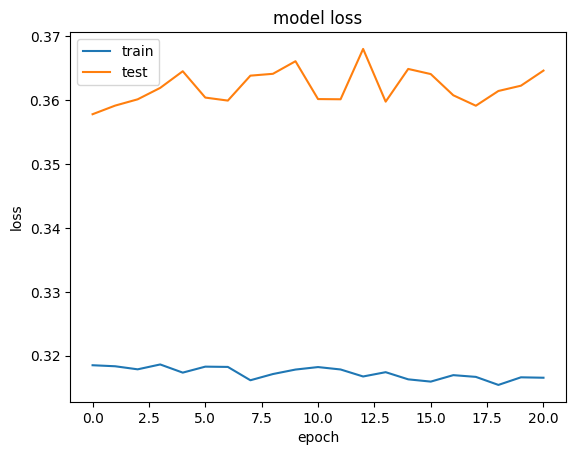

In [42]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#

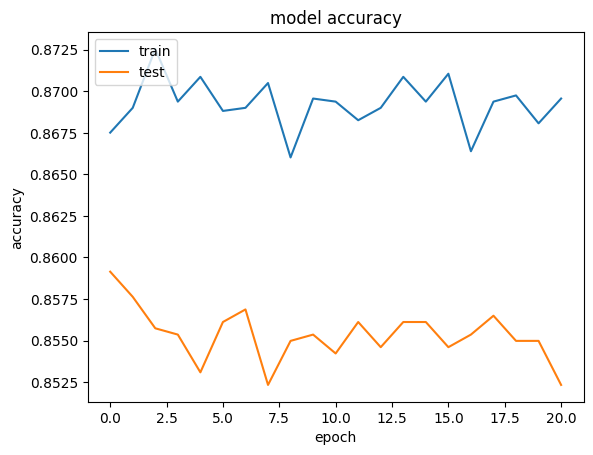

In [43]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [46]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1481,  114],
       [ 188,  217]])

In [48]:
# calculate the accuracy score
score=classifier.evaluate(X_test,y_test);
score

63/63 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8490


[0.3539523184299469, 0.8489999771118164]

In [50]:
classifier.get_weight_paths

<bound method Functional.get_weight_paths of <keras.engine.sequential.Sequential object at 0x78185ff60610>>

In [51]:
#https://medium.com/@abhishekjainindore24/all-about-anns-and-dropout-39099dbc9f7e
# Dropout example
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset (example: Titanic dataset)
data = pd.read_csv("titanic.csv")

# Preprocess the data
# Example: dropping irrelevant columns and filling missing values
data = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=["Sex", "Embarked"], drop_first=True)

# Split the data into features and target
X = data.drop(columns=["Survived"])
y = data["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10


/tmp/ipython-input-51-2836037841.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
/tmp/ipython-input-51-2836037841.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

23/23 [==============================] - 1s 14ms/step - loss: 0.6263 - accuracy: 0.6657 - val_loss: 0.5220 - val_accuracy: 0.7709
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7992 - val_loss: 0.4361 - val_accuracy: 0.8101
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4486 - accuracy: 0.8160 - val_loss: 0.4194 - val_accuracy: 0.8101
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4345 - accuracy: 0.8090 - val_loss: 0.4133 - val_accuracy: 0.7989
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.4267 - accuracy: 0.8118 - val_loss: 0.4143 - val_accuracy: 0.7989
Epoch 6/10
23/23 [==============================] - 0s 7ms/step - loss: 0.4397 - accuracy: 0.8090 - val_loss: 0.4125 - val_accuracy: 0.8156
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4171 - accuracy: 0.8104 - val_loss: 0.4102 - val_accuracy: 0.8101
Epoch 8/10
23/23 [============